In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import openpathsampling as paths
import numpy as np

In [2]:
topology = paths.engines.toy.Topology(n_spatial=3, 
                                      n_atoms=2, 
                                      masses=np.array([2.0, 8.0]), 
                                      pes=None)
initial_snapshot = paths.engines.toy.Snapshot(
    coordinates=np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]),
    velocities=np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.0]]),
    topology=topology
)

We'll define the modifier at two different temperatures, and we'll run each for 10000 snapshots. Note also that our two atoms have different masses.

In [3]:
modifier_1 = paths.RandomVelocities(beta=1.0)
modifier_5 = paths.RandomVelocities(beta=1.0/5.0)

In [4]:
snapshots_1 = [modifier_1(initial_snapshot) for i in range(10000)]
snapshots_5 = [modifier_5(initial_snapshot) for i in range(10000)]

Within each atom, all 3 DOFs will be part of the same distribution. We create a few lists with names of the form `v_${BETA}_${ATOM_NUMBER}`. These are the results we'll histogram and test.

In [5]:
v_1_0 = sum([s.velocities[0].tolist() for s in snapshots_1], [])
v_1_1 = sum([s.velocities[1].tolist() for s in snapshots_1], [])
v_5_0 = sum([s.velocities[0].tolist() for s in snapshots_5], [])
v_5_1 = sum([s.velocities[1].tolist() for s in snapshots_5], [])

We know what the distribution should look like, so we write it down explicitly:

In [6]:
def expected(beta, mass, v):
    alpha = 0.5*beta*mass
    return np.sqrt(alpha/np.pi)*np.exp(-alpha*v**2)

Now we take each total distribution, and compare it to the expected distribution. This is where we have to use our eyes to check the correctness.

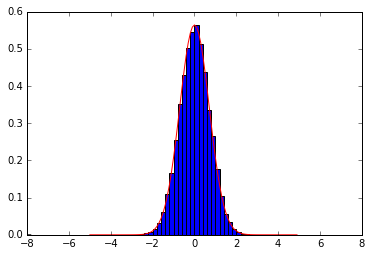

In [7]:
v = np.arange(-5.0, 5.0, 0.1)
bins = np.arange(-8.0, 8.0, 0.2)
plt.hist(v_1_0, bins=bins, normed=True)
plt.plot(v, expected(1.0, 2.0, v), 'r');

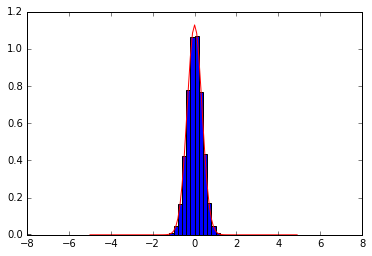

In [8]:
v = np.arange(-5.0, 5.0, 0.1)
bins = np.arange(-8.0, 8.0, 0.2)
plt.hist(v_1_1, bins=bins, normed=True)
plt.plot(v, expected(1.0, 8.0, v), 'r');

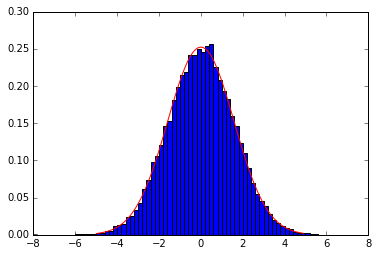

In [9]:
v = np.arange(-5.0, 5.0, 0.1)
bins = np.arange(-8.0, 8.0, 0.2)
plt.hist(v_5_0, bins=bins, normed=True)
plt.plot(v, expected(0.2, 2.0, v), 'r');

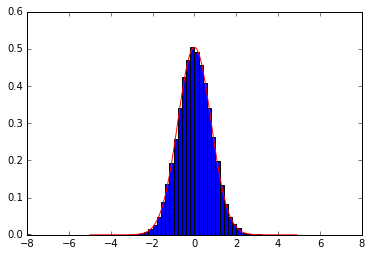

In [10]:
v = np.arange(-5.0, 5.0, 0.1)
bins = np.arange(-8.0, 8.0, 0.2)
plt.hist(v_5_1, bins=bins, normed=True)
plt.plot(v, expected(0.2, 8.0, v), 'r');

If the red lines match the blue histograms, we're good. Otherwise, something has gone terribly wrong.